<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

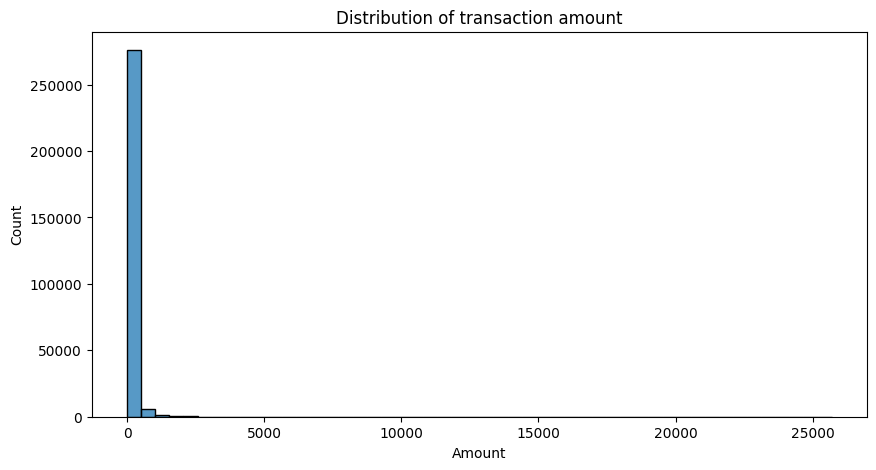

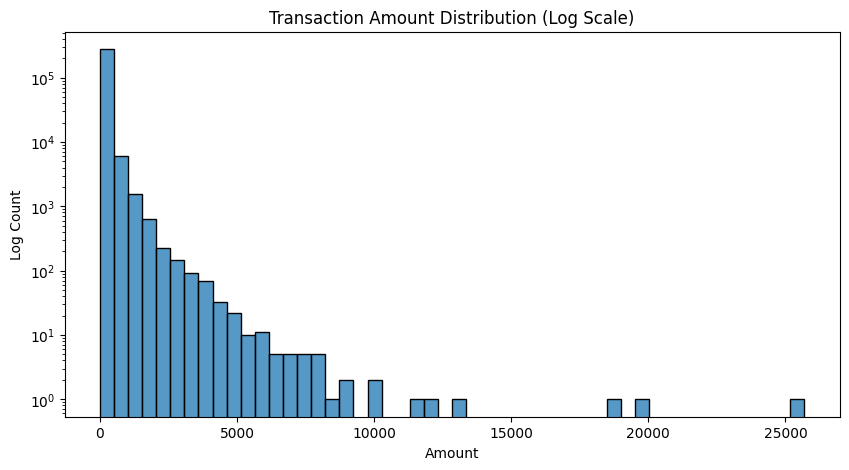

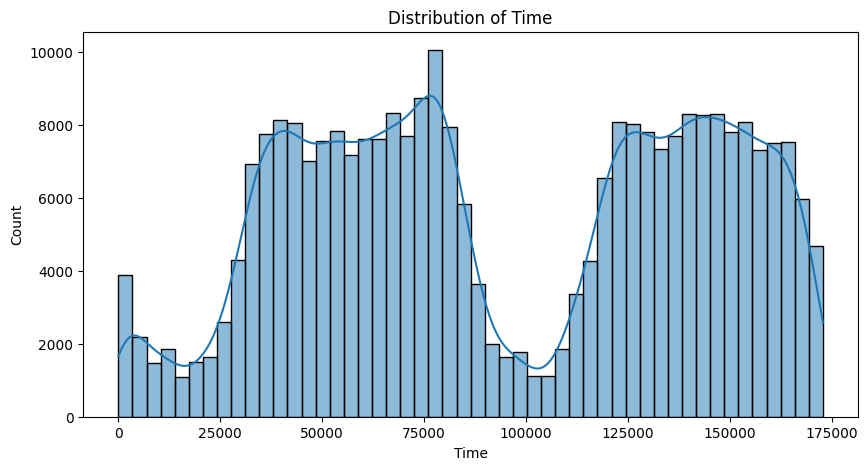

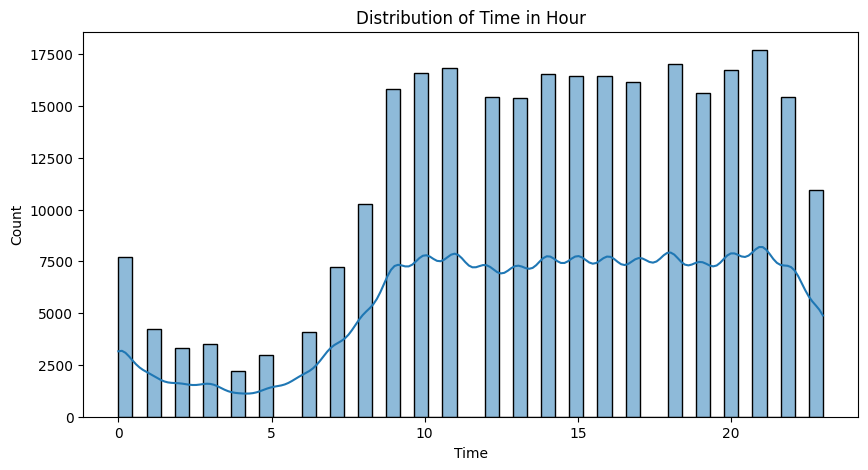

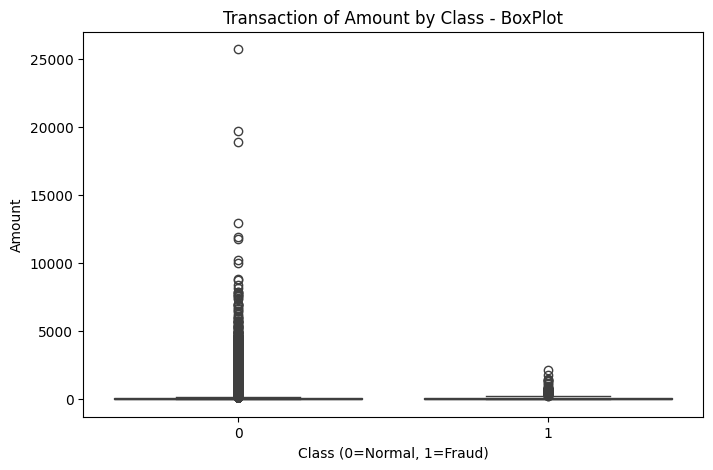

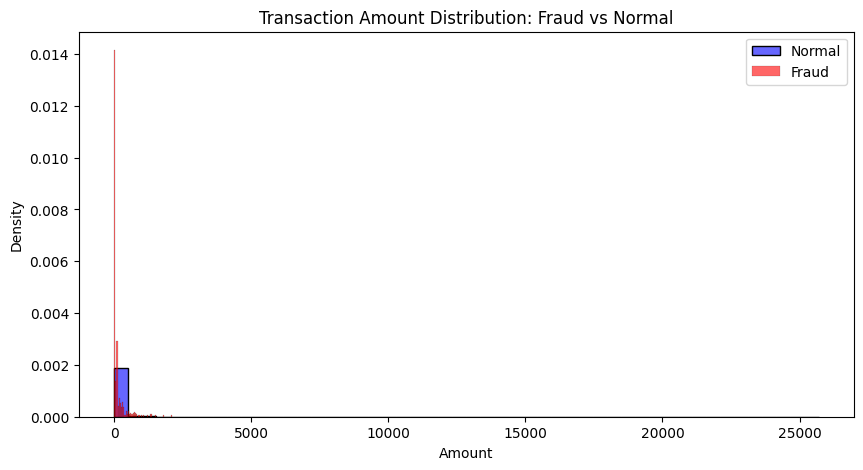

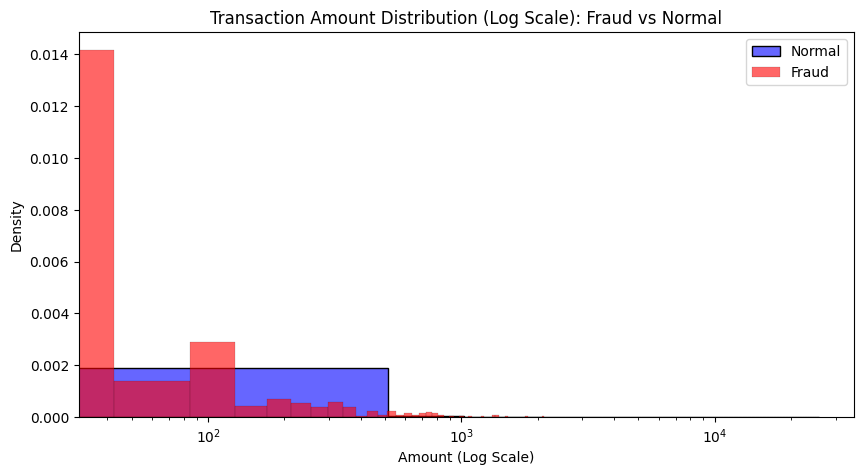

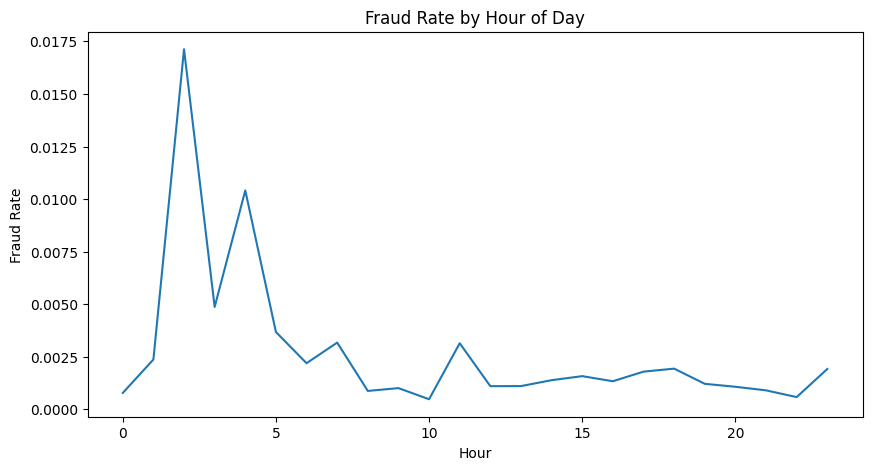

In [24]:
# Data Exploration 
# Focus: Understanding risk patterns and preparing data for modeling, while emphasizing controls and mitigation.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact

df = pd.read_csv('creditcard.csv')
df.head()
df.info()
df.describe()

# Creating Hour column 
df['Hour'] = (df['Time'] // 3600) % 24

plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=50)
plt.title("Distribution of transaction amount")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

#Because bin width is linear, and data is heavily skewed it is better to try log scale
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=50)
plt.yscale('log')
plt.title("Transaction Amount Distribution (Log Scale)")
plt.xlabel("Amount")
plt.ylabel("Log Count")
plt.show()
#this made high value transactions visible


plt.figure(figsize=(10,5))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title("Distribution of Time")
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()

#hours is more interpretable
plt.figure(figsize=(10,5))
sns.histplot(df['Hour'], bins=50, kde=True)
plt.title("Distribution of Time in Hour")
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Class'], y=df['Amount']) 
plt.title("Transaction of Amount by Class - BoxPlot")
plt.xlabel("Class (0=Normal, 1=Fraud)")
plt.ylabel("Amount")
plt.show()
# Interpretation: 
# Fraud transactions are mostly low-value, with very few high-value cases.
# This matches real-world fraud behavior fraudsters often start with small test transactions to check if the card works and to avoid alerts.
# This makes the pattern in the plot a meaningful business insight.


plt.figure(figsize=(10,5)) 
sns.histplot(df[df['Class']==0]['Amount'], bins=50, color='blue', label='Normal', stat='density', alpha=0.6) 
sns.histplot(df[df['Class']==1]['Amount'], bins=50, color='red', label='Fraud', stat='density', alpha=0.6) 
plt.title('Transaction Amount Distribution: Fraud vs Normal') 
plt.xlabel('Amount') 
plt.ylabel('Density') 
plt.legend() 
plt.show()
# Interpretation:
# Fraud cases are rare overall, so the density is shown relative to fraud-only data.
# The key takeaway is that fraud does NOT mostly happen at high transaction amounts.
# Instead, fraud is concentrated in low-value transactions that happen more frequently.
# This is an important insight for fraud risk modeling.

# To make the plot more interpretable using a log scale
df_nonzero = df[df['Amount'] > 0]
plt.figure(figsize=(10,5))
sns.histplot( df[df['Class']==0]['Amount'], bins=50, color='blue', label='Normal', stat='density', alpha=0.6)
sns.histplot( df[df['Class']==1]['Amount'], bins=50, color='red', label='Fraud', stat='density', alpha=0.6 )
plt.xscale('log')
plt.title('Transaction Amount Distribution (Log Scale): Fraud vs Normal')
plt.xlabel('Amount (Log Scale)')
plt.ylabel('Density')
plt.legend()
plt.show()


# To make it more interpretable with fraud rate by hour
hourly = df.groupby('Hour')['Class'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly.index, y=hourly.values)
plt.title("Fraud Rate by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Fraud Rate")
plt.show()
# Interpretation:
# This plot shows fraud RATE by hour, not total fraud count.
# Fraud risk peaks around 2–4 AM, with a baseline rate of ~0.25%
# and spikes reaching up to ~10% probability.
# This answers "when a transaction is most likely to be fraud",
# not "when most fraud transactions happen".
# Even hours with low transaction volume can have much higher fraud risk,
# which is a critical insight for risk management and fraud detection.


# Overall interpretation:
# Fraud risk is not driven by transaction size alone. 
# While high-value transactions exist, fraudulent activity disproportionately concentrates in low-value transactions and during early-morning hours
# suggesting fraudsters prioritize stealth over value to avoid detection.



